# Laboration 3

I denna laborationen ska vi titta på atmosfärisk CO2 data de senaste 2000 åren sammanställt av institutet för atmosfär- och klimatvetenskap i Schweiz [IAC](https://iac.ethz.ch/).

Som tidigare så är datan lagrad i CSV (comma separated values) format men denna gången så kommer vi använda modulen [Pandas](https://pandas.pydata.org) för att läsa in och jobba med datan på ett smidigare sätt.

In [17]:
# Importera modulen pandas
import pandas

In [18]:
# Ladda in klimatdata från en CSV fil
with open("co2-mm-mlo-0-2014.csv") as csvfile:
    co2data = pandas.read_csv(csvfile)

In [19]:
# Titta på de första 10 datapunkterna
co2data[:10]

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454,277.454,277.454
1,1,277.137,277.137,277.137
2,2,277.160,277.160,277.160
3,3,277.158,277.158,277.158
4,4,277.157,277.157,277.157
5,5,277.167,277.167,277.167
6,6,277.172,277.172,277.172
7,7,277.171,277.171,277.171
8,8,277.175,277.175,277.175
9,9,277.176,277.176,277.176


Kolumnerna motsvarar år, medelkoncentration CO2 globalt (andel per million mol), medelkoncentration på norra halvklotet (<b>n</b>orthern <b>h</b>emisphere) och medelkoncentration på södra halvklotet (<b>s</b>outhern <b>h</b>emisphere).

Variabeln `co2data` har typen `DataFrame`

In [20]:
type(co2data)

pandas.core.frame.DataFrame

Det ger tillgång till många behändiga funktioner och metoder för att hantera datan men det går också att få ut underliggande datan som en vanlig Python lista:

In [21]:
co2data.values.tolist()

[[0.0, 277.454, 277.454, 277.454],
 [1.0, 277.137, 277.137, 277.137],
 [2.0, 277.16, 277.16, 277.16],
 [3.0, 277.158, 277.158, 277.158],
 [4.0, 277.157, 277.157, 277.157],
 [5.0, 277.167, 277.167, 277.167],
 [6.0, 277.172, 277.172, 277.172],
 [7.0, 277.171, 277.171, 277.171],
 [8.0, 277.175, 277.175, 277.175],
 [9.0, 277.176, 277.176, 277.176],
 [10.0, 277.179, 277.179, 277.179],
 [11.0, 277.194, 277.194, 277.194],
 [12.0, 277.198, 277.198, 277.198],
 [13.0, 277.201, 277.201, 277.201],
 [14.0, 277.201, 277.201, 277.201],
 [15.0, 277.211, 277.211, 277.211],
 [16.0, 277.217, 277.217, 277.217],
 [17.0, 277.221, 277.221, 277.221],
 [18.0, 277.226, 277.226, 277.226],
 [19.0, 277.227, 277.227, 277.227],
 [20.0, 277.232, 277.232, 277.232],
 [21.0, 277.234, 277.234, 277.234],
 [22.0, 277.237, 277.237, 277.237],
 [23.0, 277.245, 277.245, 277.245],
 [24.0, 277.249, 277.249, 277.249],
 [25.0, 277.256, 277.256, 277.256],
 [26.0, 277.26, 277.26, 277.26],
 [27.0, 277.277, 277.277, 277.277],
 [28.0, 

## Filtrering

Till skillnad från en vanlig lista kan `DataFrame` filtreras enkelt, t.ex om vi vill titta på de år där CO2 koncentrationen har varit under 300 ppm så kan vi fråga

In [22]:
# Skapa ett nytt DataFrame som bara innehåller de rader där villkoret är uppfyllt, 
# i detta fallet att concentrationen CO2 är under 300 ppm.
co2data[ co2data["data_mean_global"] < 300 ]

,year,data_mean_global,data_mean_nh,data_mean_sh
0,0,277.454000,277.454000,277.454000
1,1,277.137000,277.137000,277.137000
2,2,277.160000,277.160000,277.160000
3,3,277.158000,277.158000,277.158000
4,4,277.157000,277.157000,277.157000
...,...,...,...,...
1907,1907,298.097994,298.269620,297.926369
1908,1908,298.517994,298.688272,298.347716
1909,1909,298.935993,299.110956,298.761031
1910,1910,299.376993,299.558680,299.195306


In [23]:
# Hitta data för ett specifikt år
co2data[co2data["year"] == 1900]

,year,data_mean_global,data_mean_nh,data_mean_sh
1900,1900,295.674998,295.800066,295.549931


### För intresserade: Hur filtrering av ett `DataFrame` fungerar

Filtreringen fungerar genom att villkoret lämnar tillbaka en lista av typen `bool` som indikerar vilka rader som uppfyllde villkoret. Det är sedan en speciell egenskap hos ett `DataFrame` att det kan indexeras med hjälp av en sådan lista.

In [24]:
co2data["year"] == 1900

0       False
1       False
2       False
3       False
4       False
        ...  
2010    False
2011    False
2012    False
2013    False
2014    False
Name: year, Length: 2015, dtype: bool

## Kolumner

Kolumner kan plockas ut genom att indexera ett `DataFrame` med kolumnnamnet

In [25]:
# Plocka ut kolumnen "data_mean_sh", dvs medelkoncentrationen på södra halvklotet
co2_södra_halvklotet = co2data["data_mean_sh"]

print(co2_södra_halvklotet)
type(co2_södra_halvklotet)

0       277.454000
1       277.137000
2       277.160000
3       277.158000
4       277.157000
           ...    
2010    386.649401
2011    388.846876
2012    390.995779
2013    393.735042
2014    395.503037
Name: data_mean_sh, Length: 2015, dtype: float64


pandas.core.series.Series

Notera att denna variabel har typen `Series` istället för `DataFrame`, detta för att den bara innehåller en kolumn. Vi kan fortfarande använda samma funktioner som för `DataFrame`, t.ex

In [26]:
# Skapa en vanlig Python lista
co2_södra_halvklotet = co2_södra_halvklotet.values.tolist()

print(co2_södra_halvklotet)
print(type(co2_södra_halvklotet))

[277.454, 277.137, 277.16, 277.158, 277.157, 277.167, 277.172, 277.171, 277.175, 277.176, 277.179, 277.194, 277.198, 277.201, 277.201, 277.211, 277.217, 277.221, 277.226, 277.227, 277.232, 277.234, 277.237, 277.245, 277.249, 277.256, 277.26, 277.277, 277.28, 277.282, 277.284, 277.285, 277.293, 277.291, 277.295, 277.3, 277.305, 277.311, 277.316, 277.318, 277.325, 277.33, 277.334, 277.337, 277.341, 277.343, 277.348, 277.351, 277.353, 277.36, 277.362, 277.363, 277.368, 277.371, 277.376, 277.379, 277.385, 277.387, 277.389, 277.395, 277.397, 277.402, 277.406, 277.408, 277.417, 277.423, 277.428, 277.43, 277.433, 277.437, 277.436, 277.437, 277.437, 277.445, 277.452, 277.457, 277.462, 277.461, 277.463, 277.472, 277.477, 277.481, 277.487, 277.489, 277.497, 277.505, 277.509, 277.516, 277.52, 277.528, 277.536, 277.541, 277.554, 277.56, 277.571, 277.571, 277.579, 277.584, 277.597, 277.609, 277.62, 277.623, 277.63, 277.633, 277.636, 277.645, 277.643, 277.651, 277.656, 277.659, 277.663, 277.671, 277

# Uppgift 1
Skapa ett `DataFrame` från `co2data` som innehåller datan mellan åren 1900 till senaste året. Lagra den i en variabel som heter `co2data_1900`.

# Uppgift 2

Ta fram två Python listor från datan i `co2data_1900`: en lista med år samt en lista med globala medelkoncentrationen CO2.

När du är klar så skall du alltså ha två variabler som innehåller varsin lista
```
years = [1900, 1901, ...]
co2 = [ 295.67, 296.01, ...]
```

# Uppgift 3
Rita en graf över medelkoncentrationen CO2 globalt under åren 1900 - idag med hjälp av variablerna `years` och `co2` från uppgift 2.

Använd modulen `matplotlib` för att rita grafen. Skräddarsy grafen med några kommandon från `matplotlib` (T ex. *linewidth*, *ls*, *color*). Namnge också x-axeln och y axeln med lämpliga namn.

# Grafer direkt från Pandas

Det går också att använda inbyggda funktioner i Pandas för att skapa grafer direkt från ett `DataFrame`.

In [27]:
# Skapa ett DataFrame från Python listor
df = pandas.DataFrame(
    [
        [1, 1],
        [2, 3],
        [3, 9]
    ], columns=["x", "y"])
df

,x,y
0,1,1
1,2,3
2,3,9


<Axes: xlabel='x'>

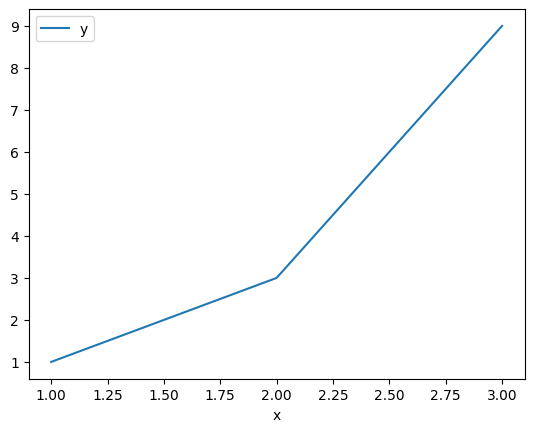

In [28]:
# Rita en graf med y som en funktion av x
df.plot(x="x", y="y")

# Uppgift 4
Gör om uppgift 3 med hjälp av de inbyggda funktionerna i `Pandas`. Skräddarsy grafen med några kommandon även här, minst 2 stycken.

# Transformera data
Det är enkelt att göra operationer på data lagrade i `DataFrame`. Och nedan följer några sådana exempel.

In [29]:
# Skapa ett DataFrame från Python listor
df = pandas.DataFrame(
    [
        [1, 1, -1],
        [2, 3, 0],
        [3, 9, 10]
    ], columns=["x", "y", "z"])

In [30]:
# Summera y och z för varje rad
df["y"] + df["z"]

0     0
1     3
2    19
dtype: int64

In [31]:
# Plocka ut kolumnen y och multiplicera varje rad med 2
2 * df["x"]

0    2
1    4
2    6
Name: x, dtype: int64

## Skapa nya kolumner

Det går att lagra en ny kolumn i ett `DataFrame`, antingen från ny data eller kanske som en funktion av de kolumner som redan finns.

In [32]:
df = pandas.DataFrame(
    [
        [1, 1, -1],
        [2, 3, 0],
        [3, 9, 10]
    ], columns=["x", "y", "z"])

df["y plus z"] = df["y"] + df["z"]
df

,x,y,z,y plus z
0,1,1,-1,0
1,2,3,0,3
2,3,9,10,19


# Uppgift 5
Jämför norra och södra halvklotets koncentration genom att rita en graf över skillnaden mellan dem.
Om norra halvklotets koncentration ges av $C_n$ och södra av $C_s$ så är vi intresserade av att titta på
$$ C_n - C_s $$

Vad säger detta om utsläpp? Är det någon speciell period som sticker ut? Försök att hitta någon händelse i historien som kan förklara detta.

# Uppgift 6 - **Utmaning (frivillig)**

Uppgifterna nedan är frivilliga, och en aning mer komplicerade. Dessa kan ses som en bra övning för er med lite extra tid, eller er som söker större utmaning.

## 6.1
Skapa en ny kolumn i `co2data_1900` som innehåller ett glidande medelvärde över 10 år för:
* Globala medelkoncentrationen CO2.
* Skillnaden mellan norra och södra halvklotets medelkoncentration CO2.

Plotta sedan dessa två grafer i en och samma figur (t ex. via `matplotlib.pyplot.subplot(...)`). Mer information om glidande medelvärde finner du här: [glidande medelvärde](https://en.wikipedia.org/wiki/Glidande_medelvärde)

## 6.2 – Beräkna årlig procentuell förändring

Beräkna och visualisera den årliga procentuella förändringen i den globala CO₂-koncentrationen.

#### Uppgifter:
1. Skapa en ny kolumn som visar den procentuella förändringen jämfört med föregående år:

$$
   \text{Procentuell förändring} = \frac{\text{CO₂}_{\text{år}} - \text{CO₂}_{\text{föregående år}}}{\text{CO₂}_{\text{föregående år}}} \times 100
$$

2. Plotta den procentuella förändringen över tid för att analysera trender.
